In [3]:
from skimage.segmentation import slic, felzenszwalb
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
from skimage.measure import regionprops

import matplotlib.pyplot as plt
import argparse

In [5]:
# image_file_and_path = 'ref/coral2.jpg'

image_file_and_path = '/Users/Mark/fruitpunch/coral_detection/data/15025060801.jpg'

image = img_as_float(io.imread(image_file_and_path))
print(image.shape)

(1398, 1398, 3)


In [14]:
len(regions)


42

In [15]:
len(xs)

42

<ipython-input-16-57a27b6a4eeb>:9: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = slic(image, n_segments = n_segments, sigma = 5, compactness=20)


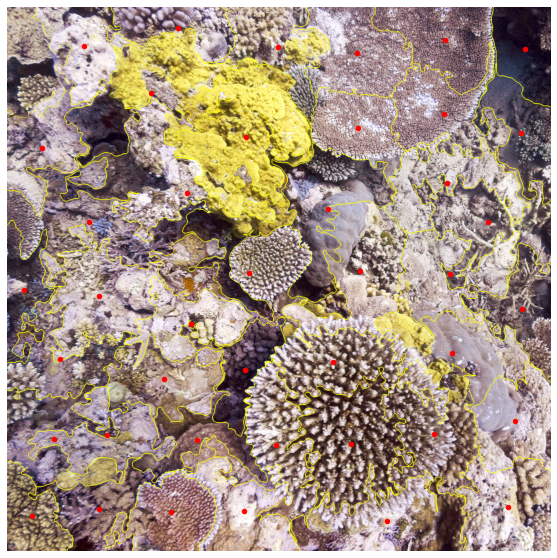

In [16]:
import matplotlib.patches as patches

# apply SLIC and extract (approximately) the supplied number
# of segments

n_segments = 50

#segments = felzenszwalb(image, scale=500, sigma=numSegments, min_size=500)
segments = slic(image, n_segments = n_segments, sigma = 5, compactness=20)
regions = regionprops(segments)
numSegments = len(regions)

#initialize array to hold segment centroids
xs=[]
ys=[]

fig = plt.figure("Superpixels -- %d segments" % (numSegments), figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(image, segments))
for i, props in enumerate(regions):
    y, x = props.centroid  # centroid coordinates
    xs.append(x)
    ys.append(y)
    
ax.scatter(x=xs, y=ys, c='r', s=20)

plt.axis("off")
plt.show()